# Neural Network and Math Playtime
## Goals
* Experiment with data produced from simple mathematical functions
* Test the ability of NNs to model nonlinear functions
* How many neurons (in parallel) and layers (in series) are needed?
* How do different activation functions affect the modelling
  * ReLU, ELU, Sigmoid, Tanh

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Import Tensorflow libraries

from tensorflow import keras
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
from tensorflow.keras import Input, Model
from tensorflow.keras import layers

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
# Start with linear function
func0_par_0=1
func0_par_1=1
def function0(x):
    # start with quadratic
#    return func0_par_0 + func0_par_1*x
    return func0_par_0 + func0_par_1*x*x

In [4]:
rng = np.random.default_rng(seed=42)


In [5]:
N_x_samples = 512

x_mu = 0.0
x_sig = 1.0
# sample x values 

x_values = rng.normal(x_mu,x_sig,N_x_samples)

In [6]:
#print(x_values)
print(type(x_values))
y_f0_values = np.array(list(map(function0,x_values)))

<class 'numpy.ndarray'>


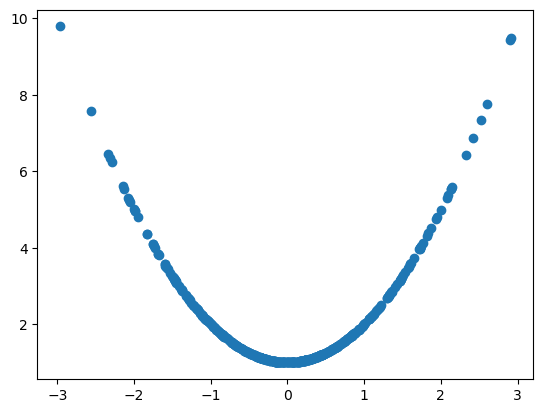

In [7]:
fig, ax = plt.subplots()
ax.plot(x_values,y_f0_values,marker='o',linestyle='')

In [8]:
from sklearn.model_selection import train_test_split


In [9]:
test_size=0.15
local_X = x_values
local_y = y_f0_values
X_train, X_valid, y_train, y_valid = train_test_split(local_X, local_y, test_size=test_size, shuffle=True)


In [10]:
# 
def BuildMyNN(n_inputs,n_deep_neurons,n_deep_layers,activation='relu'):
    """
    Build a NN with the TensorFlow functional API

    :param n_inputs: how many dimensions in our input
    :param n_deep_neurons: how many neurons to include in each deep layer
    :param n_deep_layers: how many deep layers to include
    :param activation: activation function
    :return: a TensorFlow model
    """
    # enable dropout? after the deep layers?
    
    inputs = Input(shape=(n_inputs,),name='input')
    x = inputs
    for i in range(1,n_deep_layers+1):
        x = Dense(n_deep_neurons, activation=activation,name=f'deep_layer_{i}')(x)
    x = Dense(1, activation=None,name='output')(x)

    model = Model(inputs=inputs,outputs=x)
    return model
    

In [11]:
nn1 = BuildMyNN(1,10,3,activation='relu')

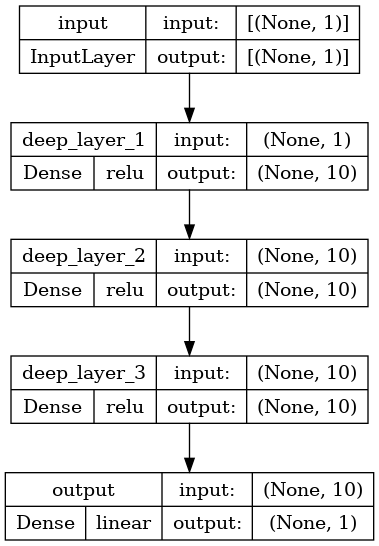

In [12]:
model = nn1
model.compile(loss='mse',optimizer='adam')

#print(model)
#model.summary()
keras.utils.plot_model(model, "model_nn1.png", show_shapes=True,show_layer_activations=True)



In [13]:
# Settings
verbose_nn = 0
# FIXME increase epochs after debugging
num_epochs=1500
#num_epochs=800
batch_size=128

history = model.fit(X_train,y_train,epochs=num_epochs,validation_data=(X_valid, y_valid),batch_size=batch_size,verbose=verbose_nn)

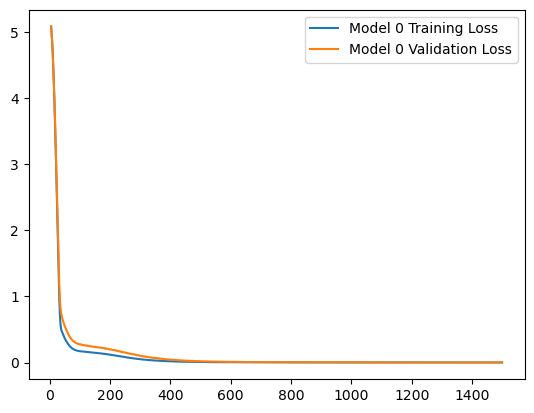

In [14]:
model_label = '0'
history_df = pd.DataFrame(history.history)
history_df.loc[5:, ['loss', 'val_loss']].plot()
plt.legend([f'Model {model_label} Training Loss',f'Model {model_label} Validation Loss'])
plt.savefig(f'model_{model_label}_fit_history.png')




In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
#import tensorflow_addons as tfa

# metric for NNs
#r_square_metric = tfa.metrics.RSquare()

In [17]:
y_pred_train = model.predict(X_train)
y_pred_valid = model.predict(X_valid)


train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_valid, y_pred_valid, squared=False)
print(f'Found Training RMSE = {train_rmse} and Test RMSE = {test_rmse}')

3/3 [==============================] - 0s 3ms/step
Found Training RMSE = 0.02532052512262814 and Test RMSE = 0.035731964804304815


32/32 [==============================] - 0s 1ms/step


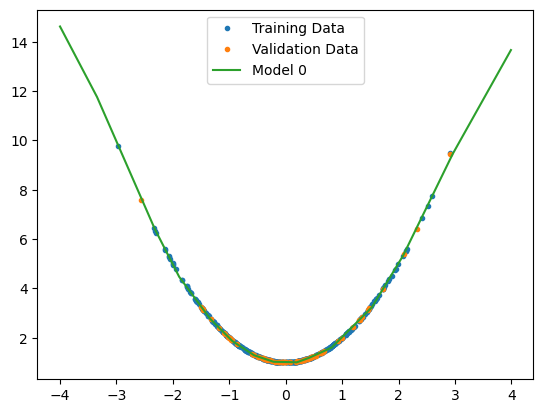

In [18]:
n_plot_x_points = 1000
n_plot_x_min = -4.0
n_plot_x_max = 4.0
def plot_model(model,ax,label=''):
    # assume still
    x_values = np.arange(n_plot_x_min,n_plot_x_max,(n_plot_x_max - n_plot_x_min)/n_plot_x_points)
    y_values = model.predict(x_values)
    ax.plot(x_values,y_values,label=label)
    
fig,ax = plt.subplots()
ax.plot(X_train,y_train,label='Training Data',marker='.',linestyle='')
ax.plot(X_valid,y_valid,label='Validation Data',marker='.',linestyle='')
plot_model(model,ax,"Model 0")
plt.legend()

## Comparing different models

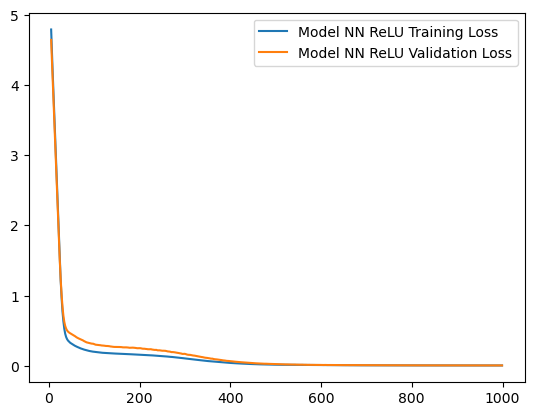

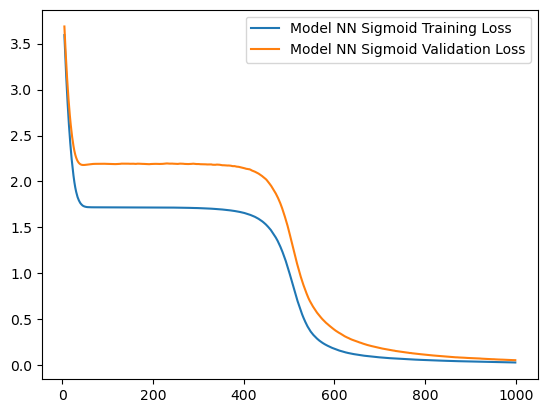

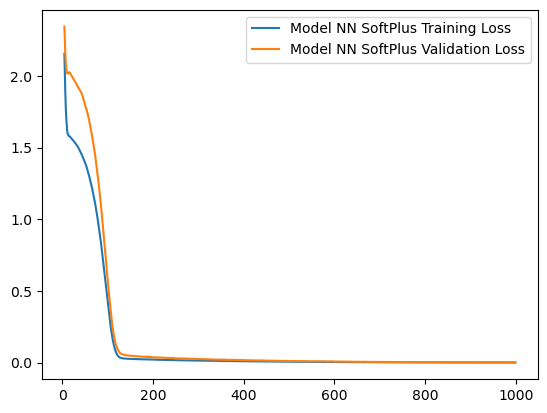

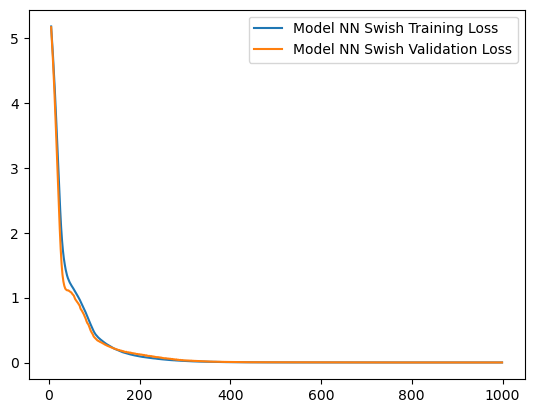

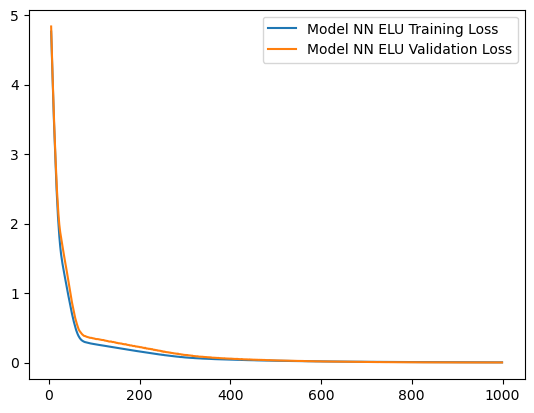

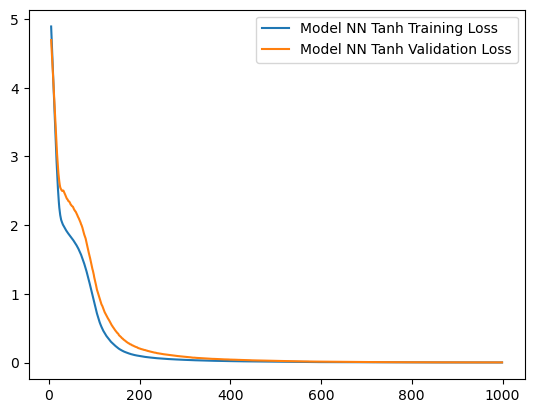

In [19]:
models = []
model_names=[]

model = BuildMyNN(1,10,3,activation='relu')
model.compile(loss='mse',optimizer='adam')
models.append(model)
model_names.append('NN ReLU')

model = BuildMyNN(1,10,3,activation='sigmoid')
model.compile(loss='mse',optimizer='adam')
models.append(model)
model_names.append('NN Sigmoid')

model = BuildMyNN(1,10,3,activation='softplus')
model.compile(loss='mse',optimizer='adam')
models.append(model)
model_names.append('NN SoftPlus')

model = BuildMyNN(1,10,3,activation='swish')
model.compile(loss='mse',optimizer='adam')
models.append(model)
model_names.append('NN Swish')

model = BuildMyNN(1,10,3,activation='elu')
model.compile(loss='mse',optimizer='adam')
models.append(model)
model_names.append('NN ELU')

model = BuildMyNN(1,10,3,activation='tanh')
model.compile(loss='mse',optimizer='adam')
models.append(model)
model_names.append('NN Tanh')

# Settings
verbose_nn = 0
# FIXME increase epochs after debugging
num_epochs=1000
#num_epochs=800
batch_size=128

histories=[]

for i in range(len(models)):
    model = models[i]
    history = model.fit(X_train,y_train,epochs=num_epochs,validation_data=(X_valid, y_valid),batch_size=batch_size,verbose=verbose_nn)
    histories.append(history)
    model_name = model_names[i]
    model_label = f'{i+1}'
    history_df = pd.DataFrame(history.history)
    history_df.loc[5:, ['loss', 'val_loss']].plot()
    plt.legend([f'Model {model_name} Training Loss',f'Model {model_name} Validation Loss'])
    plt.savefig(f'model_{model_label}_fit_history.png')



3/3 [==============================] - 0s 4ms/step
Model 0 Found Training RMSE = 0.028894340633409916 and Test RMSE = 0.04587591426236544
3/3 [==============================] - 0s 3ms/step
Model 1 Found Training RMSE = 0.028894340633409916 and Test RMSE = 0.04587591426236544
3/3 [==============================] - 0s 3ms/step
Model 2 Found Training RMSE = 0.028894340633409916 and Test RMSE = 0.04587591426236544
3/3 [==============================] - 0s 3ms/step
Model 3 Found Training RMSE = 0.028894340633409916 and Test RMSE = 0.04587591426236544
3/3 [==============================] - 0s 4ms/step
Model 4 Found Training RMSE = 0.028894340633409916 and Test RMSE = 0.04587591426236544
3/3 [==============================] - 0s 3ms/step
Model 5 Found Training RMSE = 0.028894340633409916 and Test RMSE = 0.04587591426236544


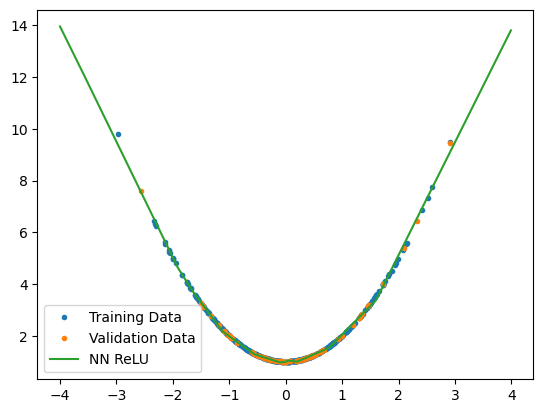

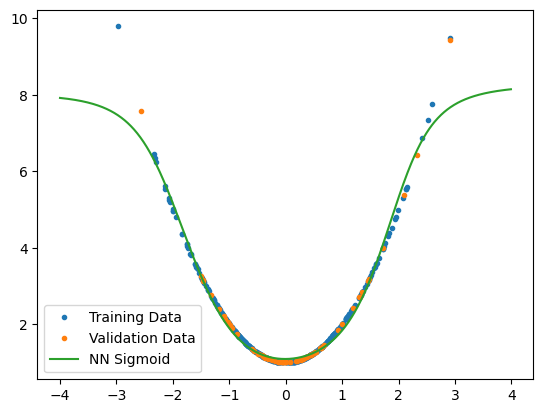

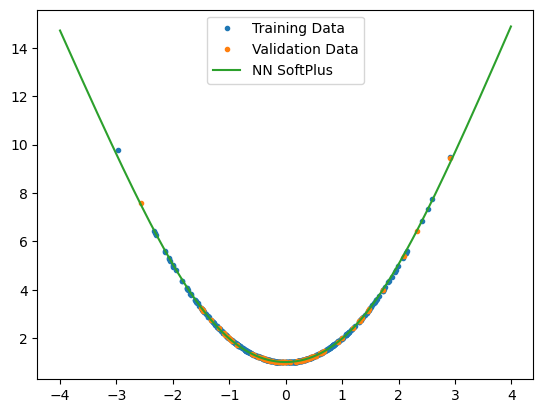

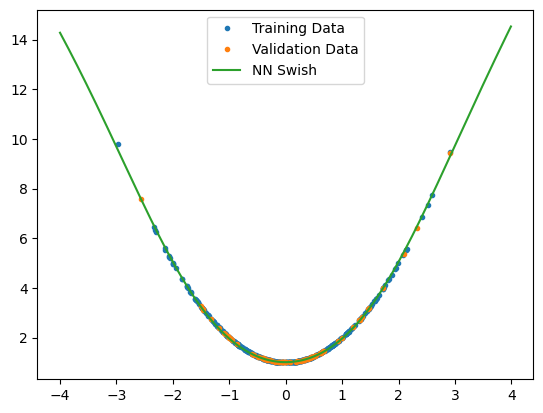

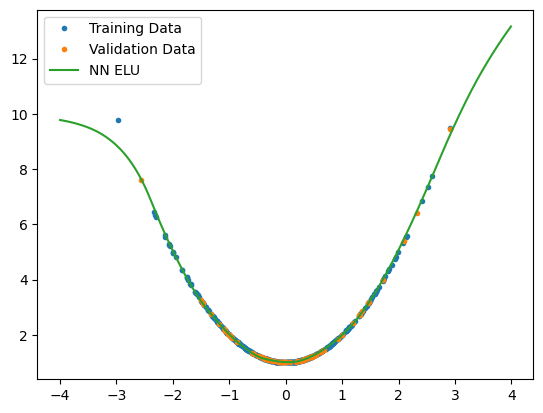

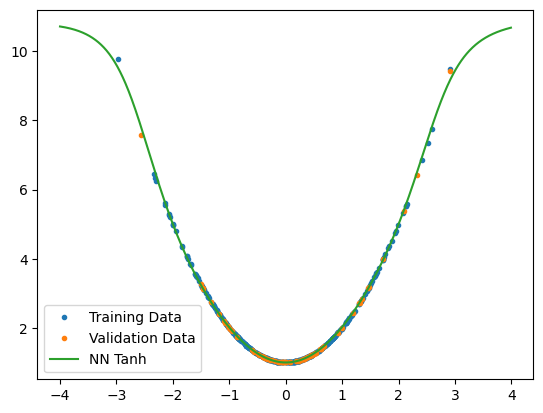

In [20]:
    
for i in range(len(models)):
    model = models[i]
    model_name = model_names[i]
    fig,ax = plt.subplots()
    ax.plot(X_train,y_train,label='Training Data',marker='.',linestyle='')
    ax.plot(X_valid,y_valid,label='Validation Data',marker='.',linestyle='')
    plot_model(model,ax,model_name)
    plt.legend()
    plt.savefig(f'model_{model_label}_plot.png')


for i in range(len(models)):
    y_pred_train = model.predict(X_train)
    y_pred_valid = model.predict(X_valid)

    model_label = f'Model {i}'
    train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
    test_rmse = mean_squared_error(y_valid, y_pred_valid, squared=False)
    print(f'{model_label} Found Training RMSE = {train_rmse} and Test RMSE = {test_rmse}')
    

# MultiDimensional Input
Let's train an NN to model functions of multiple variables
Can we train it to compute the quadratic distance between two points
I am making 6 columns, to be interpreted as $x_1,y_1,x_2,y_2,x_3,y_3$
For now, $x_3,y_3$ are essentially background noise. 

In [21]:
N_x_samples = 512
N_x_dim = 6
N_x_samples_array = []
for n in range(N_x_dim):
    N_x_samples_array.append(N_x_samples)
N_x_samples_tuple=(N_x_samples,N_x_samples,N_x_samples,N_x_samples,N_x_samples,N_x_samples)
    
x_mu = 0.0
x_sig = 1.0
# sample x values 
x_samples_list = []
for n in range(N_x_dim):
    x_local = rng.normal(x_mu,x_sig,N_x_samples)
    x_samples_list.append(x_local)
x_values = np.array(x_samples_list)

In [22]:
print(type(x_values))
print(x_values)

<class 'numpy.ndarray'>
[[ 0.09947747 -0.08610065  0.79080612 ...  0.31604787  0.40982846
   0.61613467]
 [-2.10795334 -0.36443825 -2.18021006 ... -1.1648281   2.00875539
  -0.95942775]
 [ 0.74922293 -1.68734769 -0.93026469 ... -0.99433511  0.66044257
   0.49792293]
 [ 0.10225666 -1.12295705  0.76686729 ...  0.83956809  1.43500618
   1.49012434]
 [ 0.35895644  0.04605814  1.32815662 ... -0.84532046  0.85904606
   0.2077506 ]
 [-1.57109774  0.77069878  1.26762356 ...  2.05454509  0.07845013
  -0.06166532]]


In [23]:
# compute y_values as the distance between points 1 and 2
x1 = x_values[0]
y1 = x_values[1]
x2 = x_values[2]
y2 = x_values[3]
#print(type(x1))
y_values = np.sqrt(np.square(x2 - x1) + np.square(y2 - y1))
#print(type(y_values))
print(len(y_values))
#print(y_values)

512


In [24]:
test_size=0.15
# Need to reshape x_values from (6,512) to (512,6) for test_train_split
local_X = np.transpose(x_values)
local_y = y_values
X_train, X_valid, y_train, y_valid = train_test_split(local_X, local_y, test_size=test_size, shuffle=True)


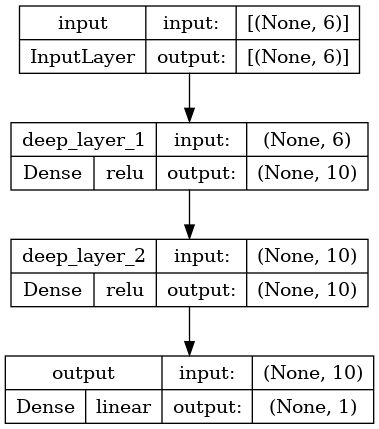

In [25]:
ndim_model1 = BuildMyNN(6,10,2,'relu')
model = ndim_model1
model.compile(loss='mse',optimizer='adam')

#print(model)
#model.summary()
keras.utils.plot_model(model, "model_ndim_nn1.png", show_shapes=True,show_layer_activations=True)



In [26]:
# Settings
verbose_nn = 0
# FIXME increase epochs after debugging
num_epochs=500
#num_epochs=800
batch_size=128

history = model.fit(X_train,y_train,epochs=num_epochs,validation_data=(X_valid, y_valid),batch_size=batch_size,verbose=verbose_nn)

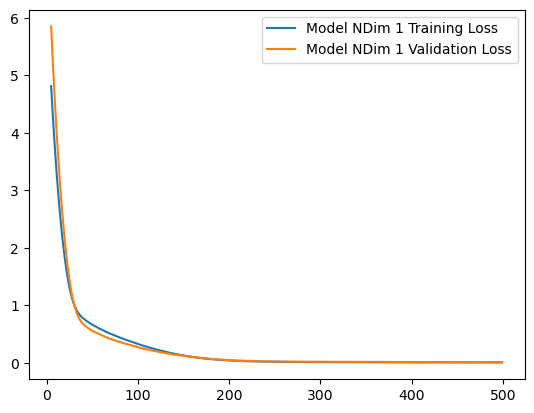

In [27]:
model_label = 'NDim 1'
history_df = pd.DataFrame(history.history)
history_df.loc[5:, ['loss', 'val_loss']].plot()
plt.legend([f'Model {model_label} Training Loss',f'Model {model_label} Validation Loss'])
plt.savefig(f'model_{model_label}_fit_history.png')




In [28]:
y_pred_train = model.predict(X_train)
y_pred_valid = model.predict(X_valid)


train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_valid, y_pred_valid, squared=False)
print(f'Found Training RMSE = {train_rmse} and Test RMSE = {test_rmse}')

3/3 [==============================] - 0s 4ms/step
Found Training RMSE = 0.08793937210102662 and Test RMSE = 0.1168597452793881


Text(0, 0.5, 'Y Predicted')

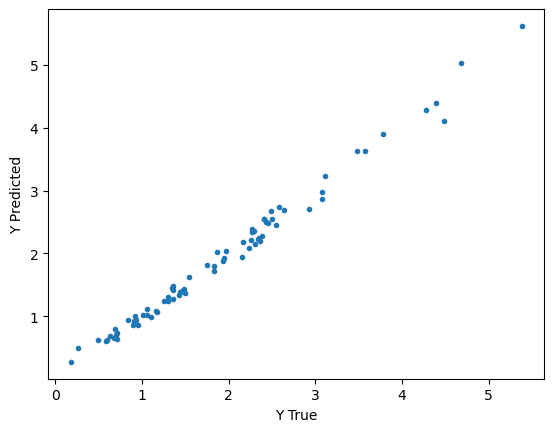

In [29]:
# Is there a nice looking plot to show off the result? Hard to plot vs the 4 relevant dimensions
fig, ax = plt.subplots()
ax.plot(y_valid,y_pred_valid,marker='.',linestyle='')
ax.set_xlabel('Y True')
ax.set_ylabel('Y Predicted')

# Mathematical Function Layers
Can we include basic mathematical functions of the inputs in the model itself? Instead of following a standard tool of computing the functions as features to add to the input, can we add internal layers that compute these?

There are a few basic options:
* https://www.tensorflow.org/api_docs/python/tf/keras/layers/Add
* https://www.tensorflow.org/api_docs/python/tf/keras/layers/Subtract
* https://www.tensorflow.org/api_docs/python/tf/keras/layers/Multiply
* https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dot

More options can be implemented with the following:
* https://www.tensorflow.org/api_docs/python/tf/keras/layers/Lambda
* Subclassing the layers class

What if we want nonlinear functions, or taking the input to the $n^{\text{th}}$ power?
We could make a layer that computes a number of functions of its input. For example, one that computes polynomial terms of its input. 
What about a layer that computes cosine sine terms such as $\cos(ax),\sin(bx)$. The inputs could give $x$, $a$, and $b$.

# Ideas for Comparisons
If we train models with different hyperparameters, then there maybe some noise in the final version of each model, which could impact the comparison in a non-obvious way. What if we compute a systematic uncertainty for each model by saving the last 10 or so versions of a model, and assign a systematic uncertainty from the standard deviation of the n versions of the model we save? 
For saving the models, we could use the Callbacks code. We could also, if we have fixed the number of epochs we fit, copy the model at each of the $n$ last epochs.
